<a href="https://colab.research.google.com/github/kny2609/Bigdata/blob/master/tf08_cifar10_cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
"""
날짜 : 2020-08-19
이름 : 김나연
내용 : 딥러닝 cifar10 CNN 이미지 분류 실습하기
"""

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image #파이썬 이미지 처리 라이브러리

In [26]:
# 학습데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

# 데이터 형태 확인
print(cifar_train_data.shape, cifar_train_label.shape)
print(cifar_test_data.shape, cifar_test_label.shape)
print(cifar_train_label)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[47329 17185 18688 24127 20395 28408 17284 14943 40719]


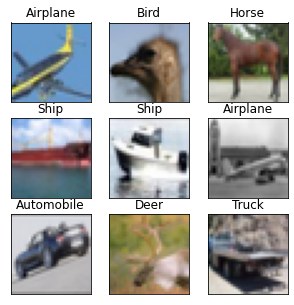

In [27]:
# 데이터 샘플 이미지 출력
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' %class_names[label])

In [28]:
# 데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(cifar_train_data, cifar_train_label)
print('훈련 데이터 : ', train_data.shape)
print('검증 데이터 : ', test_data.shape)

훈련 데이터 :  (37500, 32, 32, 3)
검증 데이터 :  (12500, 32, 32, 3)


In [30]:
# 모델학습을 위한 데이터 전처리(정규화)

# 방법1 : 픽셀데이터를 0~1사이로 초기화하는 정규화 -> 정확도 낮음
#train_data = train_data / 255
#test_data = test_data / 255
#cifar_test_data = cifar_test_data / 255

# 방법2 : 픽셀데이터를 평균과 표준편차를 이용한 정규화 -> 정확도 높음
mean = np.mean(train_data, axis=(0, 1, 2))
std = np.std(train_data, axis=(0, 1, 2))

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
cifar_test_data = (cifar_test_data - mean) / std

In [31]:
# 각 데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
cifar_test_label = to_categorical(cifar_test_label)

In [34]:
# 학습모델 구성하기
model = Sequential()

# CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# FCNN (Full Connection Neural Network, 완전연결층)
model.add(Flatten()) # 입력층
model.add(Dense(256, activation='relu'))    # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층

# 모델 요약 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [35]:
# 학습모델 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [36]:
# 학습하기
model.fit(train_data,
          train_label,
          epochs=20,
          batch_size=32,
          validation_data=(test_data, test_label))

Epoch 1/20
1172/1172 [==============================] - 7s 6ms/step - loss: 1.4687 - acc: 0.4615 - val_loss: 1.1043 - val_acc: 0.6071
Epoch 2/20
1172/1172 [==============================] - 6s 5ms/step - loss: 1.0375 - acc: 0.6327 - val_loss: 0.9157 - val_acc: 0.6793
Epoch 3/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.8561 - acc: 0.6972 - val_loss: 0.8392 - val_acc: 0.7005
Epoch 4/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.7591 - acc: 0.7315 - val_loss: 0.7580 - val_acc: 0.7320
Epoch 5/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6898 - acc: 0.7552 - val_loss: 0.7174 - val_acc: 0.7478
Epoch 6/20
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6420 - acc: 0.7731 - val_loss: 0.7476 - val_acc: 0.7461
Epoch 7/20
1172/1172 [==============================] - 6s 6ms/step - loss: 0.5944 - acc: 0.7887 - val_loss: 0.7070 - val_acc: 0.7596
Epoch 8/20
1172/1172 [==============================] - 6s 6ms

In [37]:
# 평가하기
# 학습할 때의 정확도와 평가할때 정확도가 차이나면 과적합을 의심
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.8400 - acc: 0.7663


[0.8399512767791748, 0.7663000226020813]

In [38]:
# 테스트하기
result = model.predict(cifar_test_data)
result.round()

from sklearn.metrics import accuracy_score
score = accuracy_score(result.round(), cifar_test_label)
print('점수 : ', score)

점수 :  0.7435
